In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle

sns.set_theme(style="darkgrid")

In [154]:
num = 14
save_dir = f'../experiments/exp{num}/'
with open(save_dir + 'hypers.pkl', 'rb') as f:
    params = pickle.load(f)
with open(save_dir + 'seeds.npy', 'rb') as f:
    seeds = np.load(f)
with open(save_dir + 'losses.npy', 'rb') as f:
    losses = np.load(f)
with open(save_dir + 'rewards.npy', 'rb') as f:
    rewards = np.load(f)

In [155]:
params

{'dim_obs': 3,
 'dim_act': 1,
 'dim_hid': 16,
 'n_hid_layers': 2,
 'std': 0.1,
 'scale_factor': 10,
 'gamma': 0.95,
 'lr': 0.001,
 'N_iter': 30,
 'N_episod': 400,
 'n_exp': 10,
 'lr_multi': 0.9,
 'distrib': 'uni0_0.2'}

In [156]:
losses[0].shape

(30,)

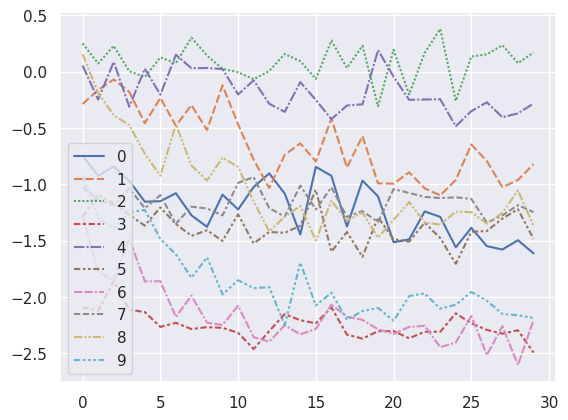

In [157]:
sns.lineplot(pd.DataFrame(losses[:, :]).T)
plt.show()

In [147]:
indeces = [0, 1, 2, 5, 7, 9]
max_len = 30
loss_df = pd.DataFrame({'loss': losses[indeces, :max_len].reshape(-1, ), 'iter': 1 + np.tile(np.arange(losses[indeces, :max_len].shape[1]), losses[indeces, :max_len].shape[0])})
reward_df = pd.DataFrame({'reward': rewards[indeces, :max_len].reshape(-1, ), 'iter': 1 + np.tile(np.arange(rewards[indeces, :max_len].shape[1]), rewards[indeces, :max_len].shape[0])})

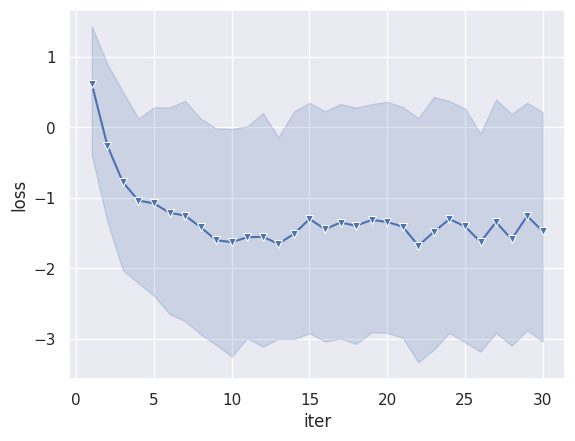

In [148]:
loss_name = f'../pres_show/opt_loss{num}.png'
sns.lineplot(loss_df, marker='v', x='iter', y='loss')
plt.savefig(loss_name)

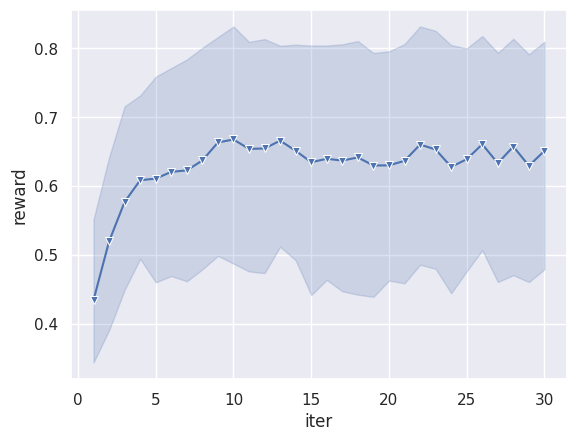

In [149]:
reward_name = f'../pres_show/opt_reward{num}.png'
sns.lineplot(reward_df, marker='v', x='iter', y='reward')
plt.savefig(reward_name)

EXP3 PES 3 lay, 8 hid dim, lr=0.01, 200 episodes
EXP4 OPT 4 8 0.001 200
EXP5 PES2 4 16 0.001 200
EXP6 OPT2 4 16 0.001 200
EXP7 uniform 0-0.2 4 8 0.0005 500
EXP11 beta1.12 4 16 0.0005 400
EXP13 beta0.8-12 5 16 0.001 200
EXP10 uni0.8-1 4 16 0.001 300
